      SP   Units   VC      FC  Revenue  Total Cost    EBITDA  Depreciation  \
0     11  100000  3.0  600000  1100000    900000.0  200000.0        125000   
1     12  110000  3.5  500000  1320000    885000.0  435000.0        125000   
2     12  100000  3.0  400000  1200000    700000.0  500000.0        125000   
3     12  110000  4.0  600000  1320000   1040000.0  280000.0        125000   
4     11  120000  3.5  600000  1320000   1020000.0  300000.0        125000   
...   ..     ...  ...     ...      ...         ...       ...           ...   
9995   8   75000  3.0  400000   600000    625000.0  -25000.0        125000   
9996  11  120000  3.5  600000  1320000   1020000.0  300000.0        125000   
9997  10  120000  3.5  500000  1200000    920000.0  280000.0        125000   
9998  12   75000  3.5  400000   900000    662500.0  237500.0        125000   
9999   8  120000  3.0  400000   960000    760000.0  200000.0        125000   

        Profit       Tax       PAT      CFAT            NPV  
0

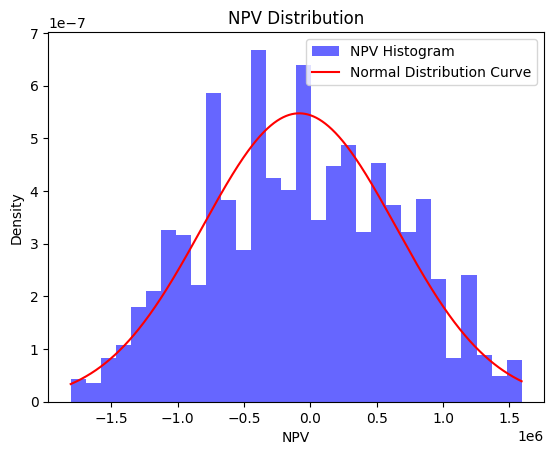

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

class NPV:
    def __init__(self, num=None, sp=None, units=None, vc=None, fc=None, revenue=None, tc=None, ebitda=None, dep=None, profit=None, npv=None):
        self.sp = sp
        self.units = units
        self.vc = vc
        self.fc = fc
        self.num = num
        self.revenue = revenue
        self.tc = tc
        self.ebitda = ebitda
        self.dep = dep
        self.profit = profit
        self.npv = npv

    def SP(self):
        self.num = random.randrange(0, 100)
        if 0 <= self.num < 25:
            self.sp = 12
        elif 25 <= self.num < 50:
            self.sp = 8
        elif 50 <= self.num < 75:
            self.sp = 11
        elif 75 <= self.num < 100:
            self.sp = 10
        return self.sp

    def UNITS(self):
        self.num = random.randrange(0, 100)
        if 0 <= self.num < 25:
            self.units = 120000
        elif 25 <= self.num < 50:
            self.units = 75000
        elif 50 <= self.num < 75:
            self.units = 110000
        elif 75 <= self.num < 100:
            self.units = 100000
        return self.units

    def FC(self):
        self.num = random.randrange(0, 100)
        if 0 <= self.num < 33:
            self.fc = 400000
        elif 33 <= self.num < 67:
            self.fc = 500000
        elif 67 <= self.num < 100:
            self.fc = 600000
        return self.fc

    def VC(self):
        self.num = random.randrange(0, 100)
        if 0 <= self.num < 25:
            self.vc = 3.5
        elif 25 <= self.num < 50:
            self.vc = 4
        elif 50 <= self.num < 75:
            self.vc = 3
        elif 75 <= self.num < 100:
            self.vc = 3
        return self.vc

    def cal(self):
        # Constants
        self.dep = 125000
        self.inv = 1000000
        
        # Calculations
        self.revenue = self.sp * self.units
        self.tc = self.fc + (self.vc * self.units)
        self.ebitda = self.revenue - self.tc
        self.profit = self.ebitda - self.dep
        self.tax = self.profit * 0.35
        self.pat = self.profit - self.tax
        self.cfat = self.pat + self.dep

        # NPV calculation over 8 years
        self.npv = (
            (self.cfat / 1.1) +
            (self.cfat / (1.1 ** 2)) +
            (self.cfat / (1.1 ** 3)) +
            (self.cfat / (1.1 ** 4)) +
            (self.cfat / (1.1 ** 5)) +
            (self.cfat / (1.1 ** 6)) +
            (self.cfat / (1.1 ** 7)) +
            (self.cfat / (1.1 ** 8)) -
            self.inv
        )
        return self.npv


# List to store results
results = []

# Run simulation for 1000 instances
for i in range(10000):
    npv_instance = NPV()
    sp_value = npv_instance.SP()
    units_value = npv_instance.UNITS()
    vc_value = npv_instance.VC()
    fc_value = npv_instance.FC()
    npv_value = npv_instance.cal()

    # Append results to the list
    results.append({
        "SP": sp_value,
        "Units": units_value,
        "VC": vc_value,
        "FC": fc_value,
        "Revenue": npv_instance.revenue,
        "Total Cost": npv_instance.tc,
        "EBITDA": npv_instance.ebitda,
        "Depreciation": npv_instance.dep,
        "Profit": npv_instance.profit,
        "Tax": npv_instance.tax,
        "PAT": npv_instance.pat,
        "CFAT": npv_instance.cfat,
        "NPV": npv_value
    })


df = pd.DataFrame(results)

print(df)

npv_values = df['NPV']

mean = npv_values.mean()
std_dev = npv_values.std()


x = np.linspace(min(npv_values), max(npv_values), 10000)
y = norm.pdf(x, mean, std_dev)


plt.hist(npv_values, bins=30, density=True, alpha=0.6, color='blue', label='NPV Histogram')
plt.plot(x, y, color='red', label='Normal Distribution Curve')

plt.title('NPV Distribution')
plt.xlabel('NPV')
plt.ylabel('Density')
plt.legend()

plt.show()